Big Data Analytics HW3
======================
##### Submission by: Shane Lindquist

##### For the first set of questions, we will be using the dataset mobile.csv, which classifies mobile phones with respect to their prices into four categories (price_range). The Dataset consists of the below 21 columns:

* battery_power
* blue
* clock_speed
* dual_sim
* fc
* four_g
* int_memory
* m_dep
* mobile_wt
* n_cores
* pc
* px_height
* px_width
* ram
* sc_h
* sc_w
* talk_time
* three_g
* touch_screen
* wifi
* price_range

#### Using this data, we will answer/complete the following tasks:

###### prep - Remove missing values from your dataset(s) before answering the following questions.

1) Use 70% of the dataset for training and the remaining as the test set.
   
    a. Generate a decision tree classifier that uses gini index as the impurity measure with a maximum depth of 3.

        i. Plot the resulting decision tree obtained after training the classifier.

        ii. Compute the accuracy on the test set.

        iii. Plot the accuracy for different depth values (try values between 2 and 20) for both training and test. Do you observe overfitting as depth increases?

   b. Generate a k-nn classifier for different number of nearest neighbors, k(hyperparameter). Consider k values between 2 and 15. Plot the accuracies.

   c. Generate a support vector machine with a linear kernel where hyperparameter C can get values [0.001, 0.01, 0.1, 1]. Plot the accuracies for different C values.

   d. Generate ensemble classifiers, bagging, boosting, and adaboost, with 150 baseclassifiers with a maximum depth of 5. Plot the accuracies for both training and test.

Which one performs better than the others?

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

#loading the dataset
df = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/mobile.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##### The problem refers to potential missingg values, though the Non-null count does not appear to reflect any. We can double check anyway:

In [3]:
#checking for null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### 1.Use 70% of the dataset for training and the remaining as the test set.

In [5]:
#splitting off 30% for the test data
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)

#confirming split
print(f"Original DataFrame shape: {df.shape}")
print(f"Training DataFrame shape: {train_df.shape} ({len(train_df)/len(df):.2%})")
print(f"Testing DataFrame shape: {test_df.shape} ({len(test_df)/len(df):.2%})")

Original DataFrame shape: (2000, 21)
Training DataFrame shape: (1400, 21) (70.00%)
Testing DataFrame shape: (600, 21) (30.00%)


##### a. Generate a decision tree classifier that uses gini index as the impurity measure with a maximum depth of 3.

In [80]:
from sklearn import tree

#setting X/Y values on the training set
trainY = train_df['price_range']
trainX = train_df.drop(['price_range'],axis=1)

#fitting decision tree
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(trainX, trainY)

        i. Plot the resulting decision tree obtained after training the classifier.

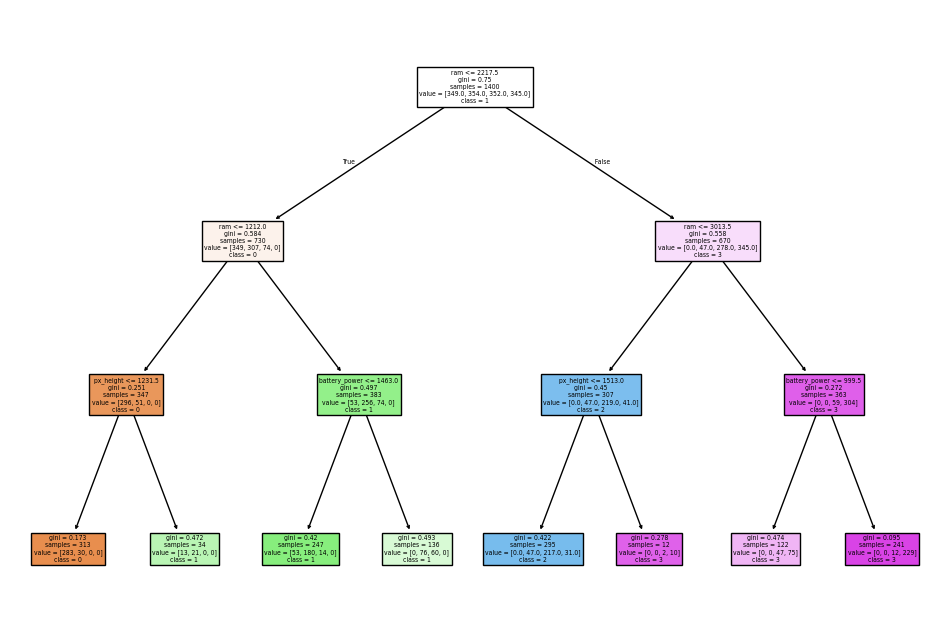

In [81]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#plotting decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=trainX.columns, class_names=['0','1','2','3'], filled=True)
plt.show()

        ii. Compute the accuracy on the test set.        

In [82]:
#setting X/Y values on the test set
testY = test_df['price_range']
testX = test_df.drop(['price_range'],axis=1)

#adding a predicted class and matching the index
predY = clf.predict(testX)
predictions = pd.concat([test_df['price_range'],pd.Series(predY,index = test_df.index, name='predicted_class')], axis=1)
predictions

,price_range,predicted_class
1860,0,0
353,2,2
1333,1,1
905,3,3
1289,1,1
...,...,...
148,2,3
1554,1,0
1956,0,0
925,1,1


In [83]:
#accuracy of a test set is calculated as the number of correct predictions divided by the total number of predictions
accurate = (predictions['price_range'] == predictions['predicted_class']).sum()
print(f"The model is {round(accurate/len(predictions),4)}% accurate")

The model is 0.7533% accurate


        iii. Plot the accuracy for different depth values (try values between 2 and 20) for both training and test. Do you observe overfitting as depth increases?

Text(0, 0.5, 'Accuracy')

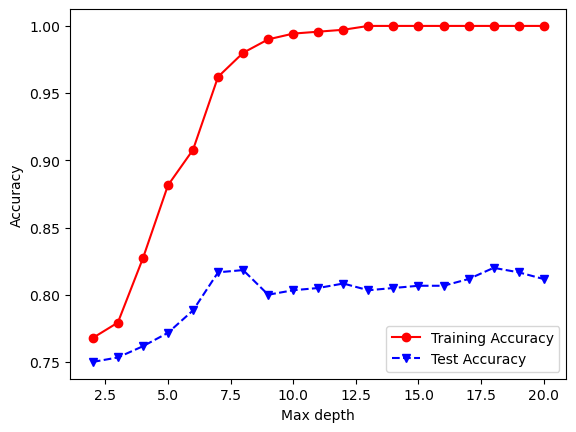

In [85]:
from sklearn.metrics import accuracy_score

#setting max depths and prepping train/test variables
maxdepths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

#iterate over train and test and record accuracy scores
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(trainX, trainY)
    Y_predTrain = clf.predict(trainX)
    Y_predTest = clf.predict(testX)
    trainAcc[index] = accuracy_score(trainY, Y_predTrain)
    testAcc[index] = accuracy_score(testY, Y_predTest)
    index += 1
    

# Plot of training and test accuracies
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

We can see test accuracy peaking around 83% at a depth of 7-8. After this training accuracy continues to increase however test accuracy decreases due to overfitting.

##### For the next set of questions, we will use the dataset data1.csv, which contains data from the 1990 U.S. Census. it consists of the following columns:

* longitude
* latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value
* ocean_proximity

    to prep the data we will load it and check for missing values

In [5]:
#loading in new dataset
df1 = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/data1.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#checking for null values
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### this time we do find some null values, so we will remove them

In [90]:
#removing rows with null values
trimmed_df1 = df1.dropna()
trimmed_df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

3) apply K-means clustering using longitude, latitude, and median income columns.

    a. Pick k and form k clusters by assigning each instance to its nearest centroid.
   
    b. Compute the centroid of each cluster.

    c. Is the k that you pick good enough? Determine the number of clusters (k) in the data
     using sum-of-square-errors.


In [130]:
from sklearn import cluster

#isolate relevant columns
data = trimmed_df1[['longitude','latitude','median_income']]

#apply kmeans using 4 clusters
k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(data) 


KMeans(max_iter=50, n_clusters=4, random_state=1)

In [131]:
#compute centroid of each cluster
labels = k_means.labels_
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,longitude,latitude,median_income
0,-121.952169,37.663451,6.130971
1,-121.627009,38.067951,2.919846
2,-117.989470,33.967870,3.024504
3,-118.055071,33.864809,6.360192


KMeans(n_clusters=3, random_state=42)


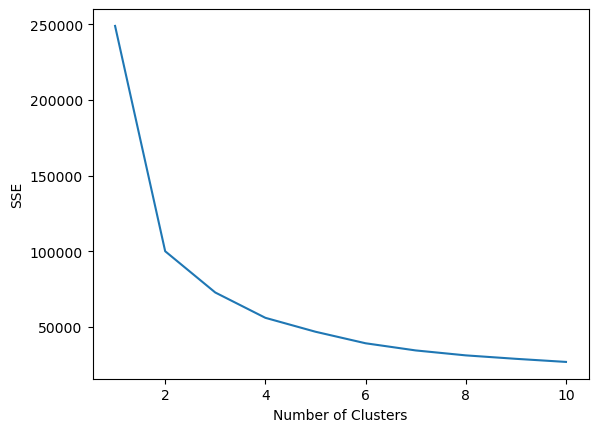

In [132]:
#determine number of clusters
numClusters = [1,2,3,4,5,6,7,8,9,10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

#print clusters and plot
print(kmeans)
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

##### For  the next set of questions, we will use the Customer Segmentation Dataset: data2.csv. It contains the following columns:

* CustomerID
* Gender
* Age
* Annual Income (k$)
* Spending Score (1-100)
* Cluster
  
    like the last dataset, first we will check for missing values

In [6]:
#loading in the final dataset
df2 = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/data2.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   cluster                 200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [10]:
#checking for null values
df2.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

none are found so we will continue with the problems

4) Use the first 50 row in the Customer Segmentation Dataset (data2.csv) and apply three hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average and plot the dendograms.

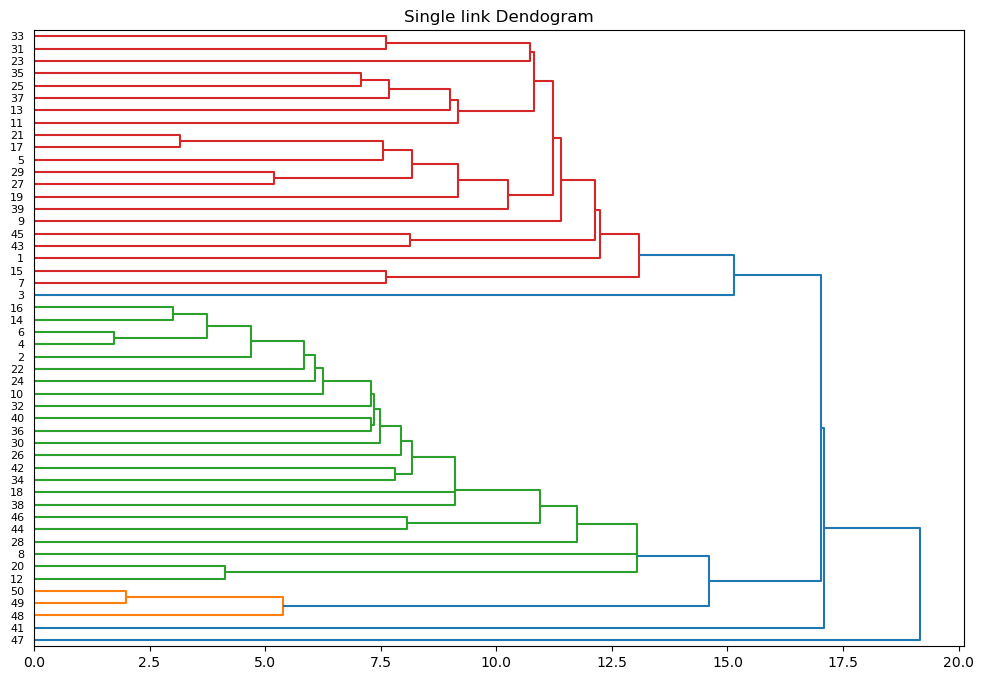

In [18]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

#selecting just the first 50 rows of data
trimmed_df2 = df2.iloc[:50]


#Single link
plt.figure(figsize=(12,8))
plt.title('Single link Dendogram')
IDs = trimmed_df2['CustomerID']
Y = trimmed_df2['cluster']
X = trimmed_df2.drop(['CustomerID','cluster'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=IDs.tolist(),orientation='right')

plt.show()

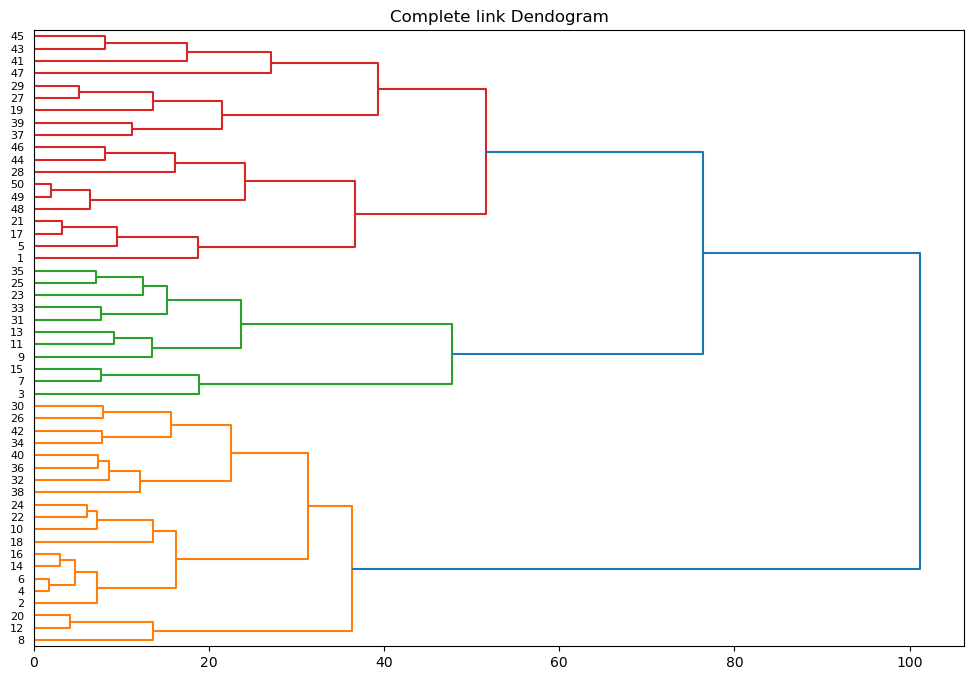

In [20]:
#complete link
plt.figure(figsize=(12,8))
plt.title('Complete link Dendogram')
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=IDs.tolist(),orientation='right')
plt.show()

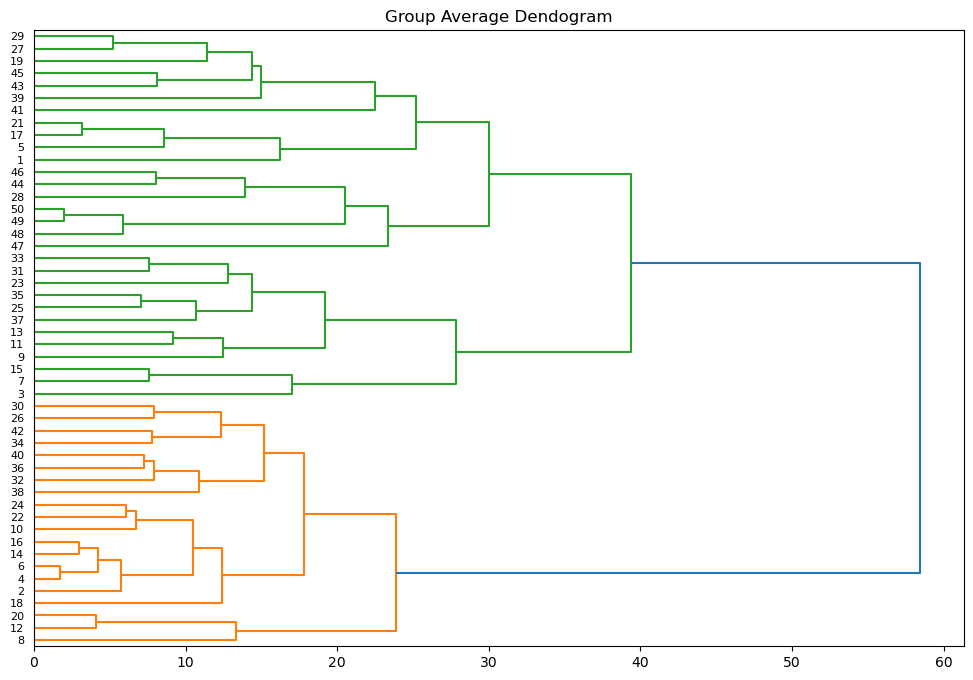

In [17]:
#Group Average
plt.figure(figsize=(12,8))
plt.title('Group Average Dendogram')
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=IDs.tolist(),orientation='right')
plt.show()

6) Use data2.csv dataset (use every row) and apply DBSCAN algorithm. Consider annual income as the x axis and spending score as the y axis and plot the clusters.

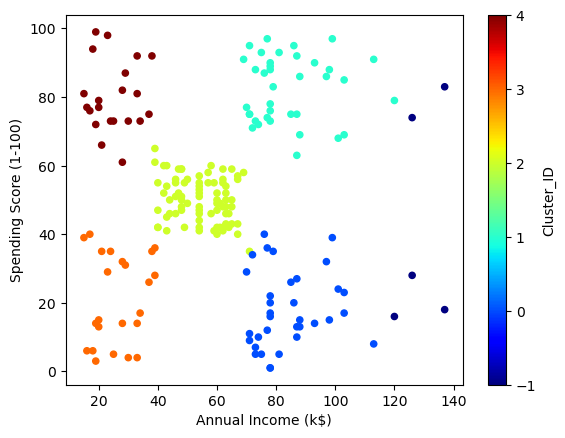

In [27]:
from sklearn.cluster import DBSCAN

#create initial dataset
data = df2[['Annual Income (k$)','Spending Score (1-100)']]

#apply DBscan
db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

#concat DBscan into data and merge the DB cluster results with the existing cluster results to filter noise
labels = pd.DataFrame(db.labels_,columns=['DB_cluster'])
result = pd.concat((df2[['Annual Income (k$)','Spending Score (1-100)','cluster']],labels), axis=1)
result['Cluster_ID'] = np.where(result['DB_cluster'] >= 0, result['cluster'], -1)

#plot
result.plot.scatter(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    c='Cluster_ID',
    colormap='jet'
)
plt.show()